In [100]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv("data/traffic_counter_data.csv", delimiter=";", parse_dates=["time_stamp"])

# df[bicycle]
df = df.rename(columns={"time_stamp":"datetime"})

df.dtypes

df

,id,datetime,person,bicycle,car,motorcycle,bus,truck,cat,dog
0,1,2021-07-14 13:39:58,1,1,1,1,1,1,1,1
1,3,2021-07-14 13:48:52,1,1,1,1,1,1,1,1
2,7,2021-07-14 13:51:35,1,1,1,1,1,1,1,1
3,8,2021-07-14 13:53:46,1,1,1,1,1,1,1,1
4,9,2021-07-14 13:54:07,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
447,452,2021-07-22 20:00:00,6,0,15,0,0,0,0,0
448,453,2021-07-22 20:15:00,19,1,12,0,0,0,0,0
449,454,2021-07-22 20:30:00,9,0,6,0,0,0,0,0
450,455,2021-07-22 20:45:00,13,0,20,0,0,0,0,0


In [101]:
df.head(30)

df = df.iloc[8:] #remove non-calibrated time-stamps

df

# people_14_07_21 = df[df["people","time_stamp"] "time_stamp" ]

#people_14_07_21 = df["time_stamp" ]

# df["time_stamp"] = pd.to_datetime(df["time_stamp"])
# df.dtypes

,id,datetime,person,bicycle,car,motorcycle,bus,truck,cat,dog
8,13,2021-07-14 15:15:20,0,0,0,0,0,0,0,0
9,14,2021-07-14 15:45:00,4,0,23,0,0,0,0,0
10,15,2021-07-14 16:00:00,20,0,42,1,1,2,0,0
11,16,2021-07-14 16:15:00,13,0,77,2,0,0,0,0
12,17,2021-07-14 16:29:59,7,0,79,0,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...
447,452,2021-07-22 20:00:00,6,0,15,0,0,0,0,0
448,453,2021-07-22 20:15:00,19,1,12,0,0,0,0,0
449,454,2021-07-22 20:30:00,9,0,6,0,0,0,0,0
450,455,2021-07-22 20:45:00,13,0,20,0,0,0,0,0


In [102]:
df["datetime"].max() - df["datetime"].min()

Timedelta('8 days 05:44:40')

In [156]:
df["datetime"] = df["datetime"].dt.round("T") # round to nearest minute

df["time"] = df["datetime"].dt.time # separate column for times

df

import os
cwd = os.getcwd()

df.to_excel(cwd + "/data/traffic_count.xlsx")

<ipython-input-156-cd1c23548235>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["datetime"] = df["datetime"].dt.round("T") # round to nearest minute
<ipython-input-156-cd1c23548235>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["time"] = df["datetime"].dt.time # separate column for times


In [154]:
# av_traffic = df.groupby(pd.Grouper(key='datetime',freq='15min')).mean()
av_traffic = df.groupby(pd.Grouper(key='datetime',freq='15min')).mean()


# av_traffic.head(40)
av_traffic["time"] = av_traffic.index.time

av_traffic

# import os
# cwd = os.getcwd()
# file = '/data/'

# print(cwd + "/data/")

# av_traffic.to_excel(cwd + "/data/av_traffic.xlsx")

,id,person,bicycle,car,motorcycle,bus,truck,cat,dog,time
datetime,,,,,,,,,,
2021-07-14 15:15:00,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15:15:00
2021-07-14 15:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15:30:00
2021-07-14 15:45:00,14.0,4.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,15:45:00
2021-07-14 16:00:00,15.0,20.0,0.0,42.0,1.0,1.0,2.0,0.0,0.0,16:00:00
2021-07-14 16:15:00,16.0,13.0,0.0,77.0,2.0,0.0,0.0,0.0,0.0,16:15:00
...,...,...,...,...,...,...,...,...,...,...
2021-07-22 20:00:00,452.0,6.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,20:00:00
2021-07-22 20:15:00,453.0,19.0,1.0,12.0,0.0,0.0,0.0,0.0,0.0,20:15:00
2021-07-22 20:30:00,454.0,9.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,20:30:00


<AxesSubplot:xlabel='datetime'>

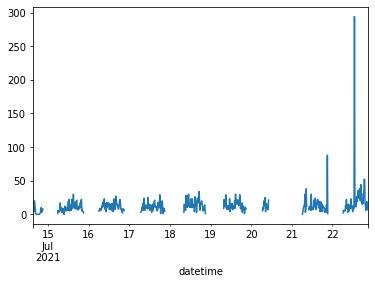

In [128]:
# av_traffic.plot.scatter(x="time", y="person")

av_traffic["person"].plot()

In [152]:
import os
cwd = os.getcwd()
print(cwd)
file = '/data/'

print(cwd + "/data/")
# cwd = cwd + r"\data\"
print('"\"data"\"')

C:\Users\jackw\PycharmProjects\traffic-counter
C:\Users\jackw\PycharmProjects\traffic-counter/data/
""data""
